In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import linalg
import PyQt5
from Classes import CrankNicolson,Hamiltonian, Math, EMField

%matplotlib notebook


In [2]:
N = 1000
x = np.zeros((N))
x = np.linspace(-50,50,N)
h = abs(x[0]-x[-1])/N
a = 1.0
p0 = 0.0
x0 = 0.0
psi = np.exp(-(x-x0)**2/(2*a**2))
C = integrate.simps(np.conjugate(psi)*psi,x)
psin = psi/np.sqrt(C)
t = np.linspace(0,2.5*15,1000)
P = np.conjugate(psin)*psin

In [3]:
%%time
H = Hamiltonian.H(x,N,h)
H.MatrixSetup()
#Math.EigenEnergy(psin,H.H,x)
H.H

CPU times: user 16.6 ms, sys: 4.19 ms, total: 20.8 ms
Wall time: 20.1 ms


array([[100. +0.j        , -50.-36.48569761j,   0. +0.j        , ...,
          0. +0.j        ,   0. +0.j        ,   0. +0.j        ],
       [-50.+36.48569761j, 100. +0.j        , -50.-36.48569761j, ...,
          0. +0.j        ,   0. +0.j        ,   0. +0.j        ],
       [  0. +0.j        , -50.+36.48569761j, 100. +0.j        , ...,
          0. +0.j        ,   0. +0.j        ,   0. +0.j        ],
       ...,
       [  0. +0.j        ,   0. +0.j        ,   0. +0.j        , ...,
        100. +0.j        , -50.-36.48569761j,   0. +0.j        ],
       [  0. +0.j        ,   0. +0.j        ,   0. +0.j        , ...,
        -50.+36.48569761j, 100. +0.j        , -50.-36.48569761j],
       [  0. +0.j        ,   0. +0.j        ,   0. +0.j        , ...,
          0. +0.j        , -50.+36.48569761j, 100. +0.j        ]])

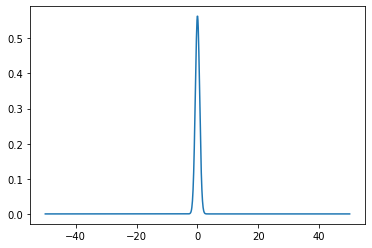

In [4]:
fig = plt.figure();
ax = fig.add_subplot(111);
#ax.set_xlim(-10,10)
ax.plot(x,P)
#plt.savefig('images/foo.png')

/home/rmhsik/Software/TFG/venv/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
/home/rmhsik/Software/TFG/venv/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


CPU times: user 1min 21s, sys: 42.4 s, total: 2min 3s
Wall time: 32.6 s


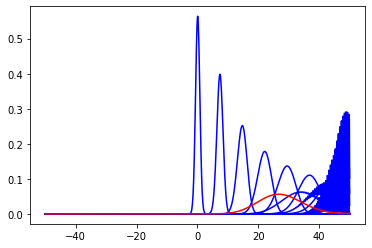

In [5]:
%%time
fig = plt.figure();
ax = fig.add_subplot(111);

H = Hamiltonian.H(x,N,h)
dt = 0.01

H.MatrixSetup()
Prop = CrankNicolson.Propagator(H,N,dt)

psi0 = psin
count = 0

for i in range(len(t)):
    psi1 = Prop.Propagate(psi0)
    count +=1
    if (i%100== 0): 
        ax.plot(x,np.conjugate(psi1)*psi1,'b')
        count += 1
    psi0 = psi1
ax.plot(x,np.conjugate(psi1)*psi1,'r')

In [ ]:
%%time
fig = plt.figure();
ax = fig.add_subplot(111);
ax.set_xlim(-10,10)
ax.set_ylim(0,1)

dt=-1j*0.01
Prop = CrankNicolson.Propagator(H,N,dt)
psi0 = psin
ep0 = Math.EigenEnergy(psi0,H.H,x)
eps = 1
delta = 1E-9
count = 0

while (eps > delta):
#for i in range(600):
    psi1 = Prop.Propagate(psi0)
    norm = Math.Norm(psi1,x)
    psi1 = psi1/np.sqrt(norm)
    #if (i%100 == 0): 
    #    ax.plot(x,np.conjugate(psi1)*psi1)
    ep1 = Math.EigenEnergy(psi1,H.H,x)
    eps = abs(np.real(ep1)-np.real(ep0))
    ep0 = ep1
    psi0 = psi1
    count +=1

ax.plot(x,np.conjugate(psin)*psin,'b')
ax.plot(x,np.conjugate(psi1)*psi1,'g')

In [ ]:
ep1

In [ ]:
def f(t):
        #Envelope function from https://doi.org/10.1016/j.physletb.2013.09.014
    m = 3
    tau = 15
    t0 = 5
    return np.exp(-np.power((t-t0)/tau,2*m))

def E(t):
    w = 1
    return 0.02*f(t)*np.sin(w*t)

def A(t):
    return -integrate.romberg(E,0,t)


In [ ]:
t = np.linspace(0,2.5*15,1000)
fig = plt.figure();
ax = fig.add_subplot(111);
l = np.zeros(1000)
e = np.zeros(1000)
a = np.zeros(1000)
for i in range(len((t))):
    a[i] = A(t[i])
    e[i] = E(t[i])
    l[i] = f(t[i])
ax.plot(t,e/np.amax(e))
ax.plot(t,l)
ax.plot(t,a/np.amax(a))

In [ ]:
t = np.linspace(-2.5*15,2.5*15,1000)
fig = plt.figure();
ax = fig.add_subplot(111);
f = np.zeros(1000)
e = np.zeros(1000)
a = np.zeros(1000)
EM = EMField.EMField(0.2,0.63,20,10,-100,2)

for i in range(len((t))):
    a[i] = EM.A(t[i])
    e[i] = EM.E(t[i])
    f[i] = EM.f(t[i])
    
ax.plot(t,e)
ax.plot(t,f)
ax.plot(t,a)

In [ ]:
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(t,a)